### Table of contents

#### 1. Import libraries
#### 2. Additional data cleaning
#### 3. Exploratory analysis
#### 4. Correlation
#### 5. Heatmaps
#### 6. Scatterplots and histograms
#### 7. Observations

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# define a path
path = r'/Users/jakubkondelka/Documents/JK_USkillings'

In [3]:
# import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'USkillings_initcleaned.pkl'))

In [5]:
# set display columns to max 
pd.options.display.max_columns = None

In [6]:
# check data frame

df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### 2. Additional data cleaning

In [7]:
# remove columns that aren't necessary : Agency Code, Agency Type and Record Source
df = df.drop(columns = ['Agency Code', 'Agency Type', 'Record Source'])

In [8]:
df.head()

,Record ID,Agency Name,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count
0,1,Anchorage,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0
1,2,Anchorage,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
2,3,Anchorage,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,0
3,4,Anchorage,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0
4,5,Anchorage,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0,1


In [8]:
df['Relationship'].isna().sum()

0

### 3. Exploratory analysis

In [19]:
# choose columns needed for visualisationsm. Create a subset 
dfsub = df[['Year', 'Crime Solved', 'Incident', 'Victim Sex', 'Victim Age', 'Perpetrator Sex', 'Perpetrator Age', 'Victim Count', 'Perpetrator Count']]

In [20]:
dfsub.head()

,Year,Crime Solved,Incident,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,Yes,1,Male,14,Male,15.0,0,0
1,1980,Yes,1,Male,43,Male,42.0,0,0
2,1980,No,2,Female,30,Unknown,0.0,0,0
3,1980,Yes,1,Male,43,Male,42.0,0,0
4,1980,No,2,Female,30,Unknown,0.0,0,1


In [21]:
dfsub.shape

(638453, 9)

### 4. Correlation

In [22]:
# check data types
dfsub.dtypes

Year                   int64
Crime Solved          object
Incident               int64
Victim Sex            object
Victim Age             int64
Perpetrator Sex       object
Perpetrator Age      float64
Victim Count           int64
Perpetrator Count      int64
dtype: object

In [23]:
# replace male, female and unknowng with numbers
dfsub.loc[dfsub['Victim Sex'] == 'Male', 'Victim Sex'] = '1'
dfsub.loc[dfsub['Victim Sex'] == 'Female', 'Victim Sex'] = '2'
dfsub.loc[dfsub['Victim Sex'] == 'Unknown', 'Victim Sex'] = '3'

In [24]:
# double check values
dfsub['Victim Sex'].value_counts()

1    494124
2    143345
3       984
Name: Victim Sex, dtype: int64

In [25]:
dfsub.head()

,Year,Crime Solved,Incident,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,Yes,1,1,14,Male,15.0,0,0
1,1980,Yes,1,1,43,Male,42.0,0,0
2,1980,No,2,2,30,Unknown,0.0,0,0
3,1980,Yes,1,1,43,Male,42.0,0,0
4,1980,No,2,2,30,Unknown,0.0,0,1


In [26]:
# replace Perpetrator sex male, female and unknowng with numbers
dfsub.loc[dfsub['Perpetrator Sex'] == 'Male', 'Perpetrator Sex'] = '1'
dfsub.loc[dfsub['Perpetrator Sex'] == 'Female', 'Perpetrator Sex'] = '2'
dfsub.loc[dfsub['Perpetrator Sex'] == 'Unknown', 'Perpetrator Sex'] = '3'

In [27]:
# double check counts
dfsub['Perpetrator Sex'].value_counts()

1    399541
3    190364
2     48548
Name: Perpetrator Sex, dtype: int64

In [28]:
dfsub.head()

,Year,Crime Solved,Incident,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,Yes,1,1,14,1,15.0,0,0
1,1980,Yes,1,1,43,1,42.0,0,0
2,1980,No,2,2,30,3,0.0,0,0
3,1980,Yes,1,1,43,1,42.0,0,0
4,1980,No,2,2,30,3,0.0,0,1


In [29]:
# replace Crime Solved with binary numbers
dfsub.loc[dfsub['Crime Solved'] == 'Yes', 'Crime Solved'] = '1'
dfsub.loc[dfsub['Crime Solved'] == 'No', 'Crime Solved'] = '2'

In [30]:
dfsub.dtypes

Year                   int64
Crime Solved          object
Incident               int64
Victim Sex            object
Victim Age             int64
Perpetrator Sex       object
Perpetrator Age      float64
Victim Count           int64
Perpetrator Count      int64
dtype: object

In [33]:
# change object data types to float64
dfsub['Crime Solved'] = dfsub['Crime Solved'].astype('float64')
dfsub['Victim Sex'] = dfsub['Victim Sex'].astype('float64')
dfsub['Perpetrator Sex'] = dfsub['Perpetrator Sex'].astype('float64')

/var/folders/wg/x5vnthvs2yz9v9gxlgg29_mm0000gn/T/ipykernel_7885/2571343281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsub['Crime Solved'] = dfsub['Crime Solved'].astype('float64')
/var/folders/wg/x5vnthvs2yz9v9gxlgg29_mm0000gn/T/ipykernel_7885/2571343281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsub['Victim Sex'] = dfsub['Victim Sex'].astype('float64')
/var/folders/wg/x5vnthvs2yz9v9gxlgg29_mm0000gn/T/ipykernel_7885/2571343281.py:4: SettingWithCopyWarning: 
A value is trying to be set 

In [34]:
dfsub.dtypes

Year                   int64
Crime Solved         float64
Incident               int64
Victim Sex           float64
Victim Age             int64
Perpetrator Sex      float64
Perpetrator Age      float64
Victim Count           int64
Perpetrator Count      int64
dtype: object

In [40]:
dfsub.shape

(638453, 9)

In [49]:
# drop a Crime solved column, this won't be needed
dfsub = dfsub.drop(columns = ['Crime Solved'])

KeyError: "['Crime Solved'] not found in axis"

In [50]:
dfsub.head()

,Year,Incident,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Victim Count,Perpetrator Count
0,1980,1,1.0,14,1.0,15.0,0,0
1,1980,1,1.0,43,1.0,42.0,0,0
2,1980,2,2.0,30,3.0,0.0,0,0
3,1980,1,1.0,43,1.0,42.0,0,0
4,1980,2,2.0,30,3.0,0.0,0,1


### 5. Heatmaps

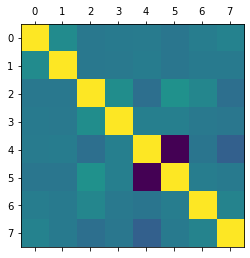

In [51]:
# first correlation map
plt.matshow(dfsub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix - Homicides')

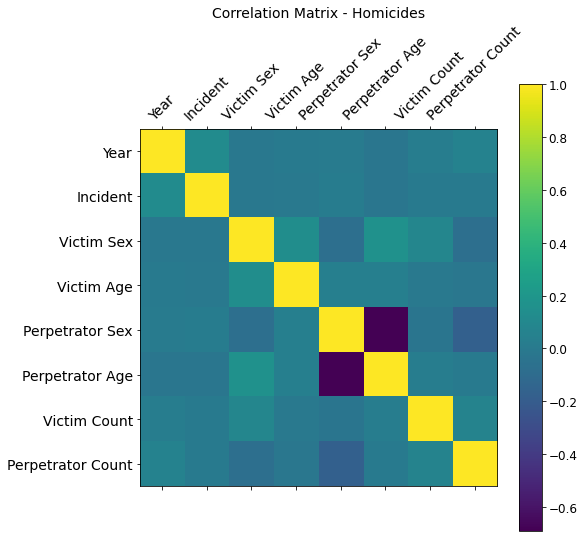

In [52]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(dfsub.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfsub.shape[1]), dfsub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(dfsub.shape[1]), dfsub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix - Homicides', fontsize=14) # add title

In [47]:
# Export chart
f.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'heatmap1.png'))

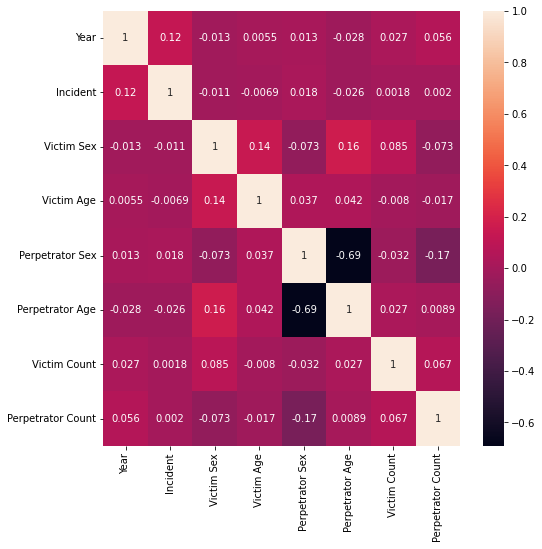

In [48]:
# create a similar correaltion heatmap, now using Seaborn

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(8,8))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(dfsub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [53]:
# Export chart
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'heatmap2.png'))

#### based on the two heatmaps, the only 2 notable connections might be between Victim sex and Perp.age - 0.16 and between Victim sex and Victim age - 0.14. Those are very small numbers, but we will explore this further 


### 6. Perpetrator Age vs Relationship - Scatterplots, Histograms, Categorical plots

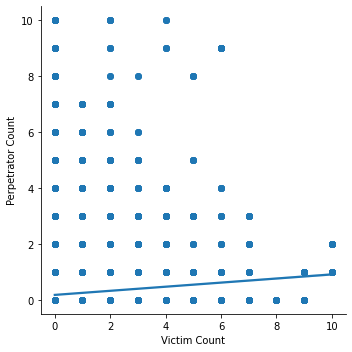

In [55]:
# Create a scatterplot for Perpetrator age and Relationship columns in seaborn

sns.lmplot(x = 'Victim Count', y = 'Perpetrator Count', data = dfsub)

### There is a small correlation between the number of victims and count of perpetrators. I.e. the more victims there are, the more likely there are more perpetrators involved. But as seen from the scatterplot, the distance of the data points from the trend line is scattered and far from it - hence the relationship is weak

<AxesSubplot:xlabel='Perpetrator Age', ylabel='Count'>

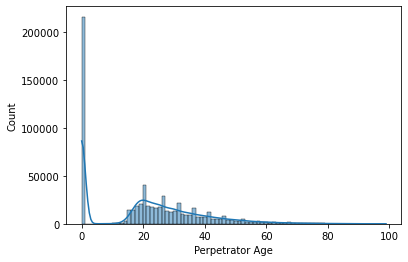

In [57]:
# check this with Histogram
sns.histplot(dfsub['Perpetrator Age'], bins = 80, kde = True)

In [61]:
# remove all values <= 10
dfsub.drop(dfsub.loc[dfsub['Perpetrator Age'] <=10].index, inplace=True)


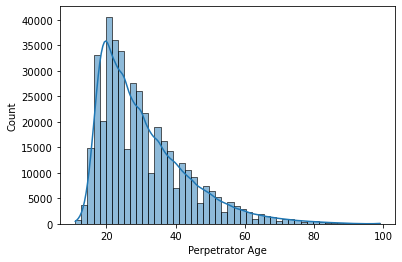

In [63]:
# check the result with Histogram
histPA = sns.histplot(dfsub['Perpetrator Age'], bins = 50, kde = True)

In [64]:
# Export chart
histPA.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'histPA.png'))

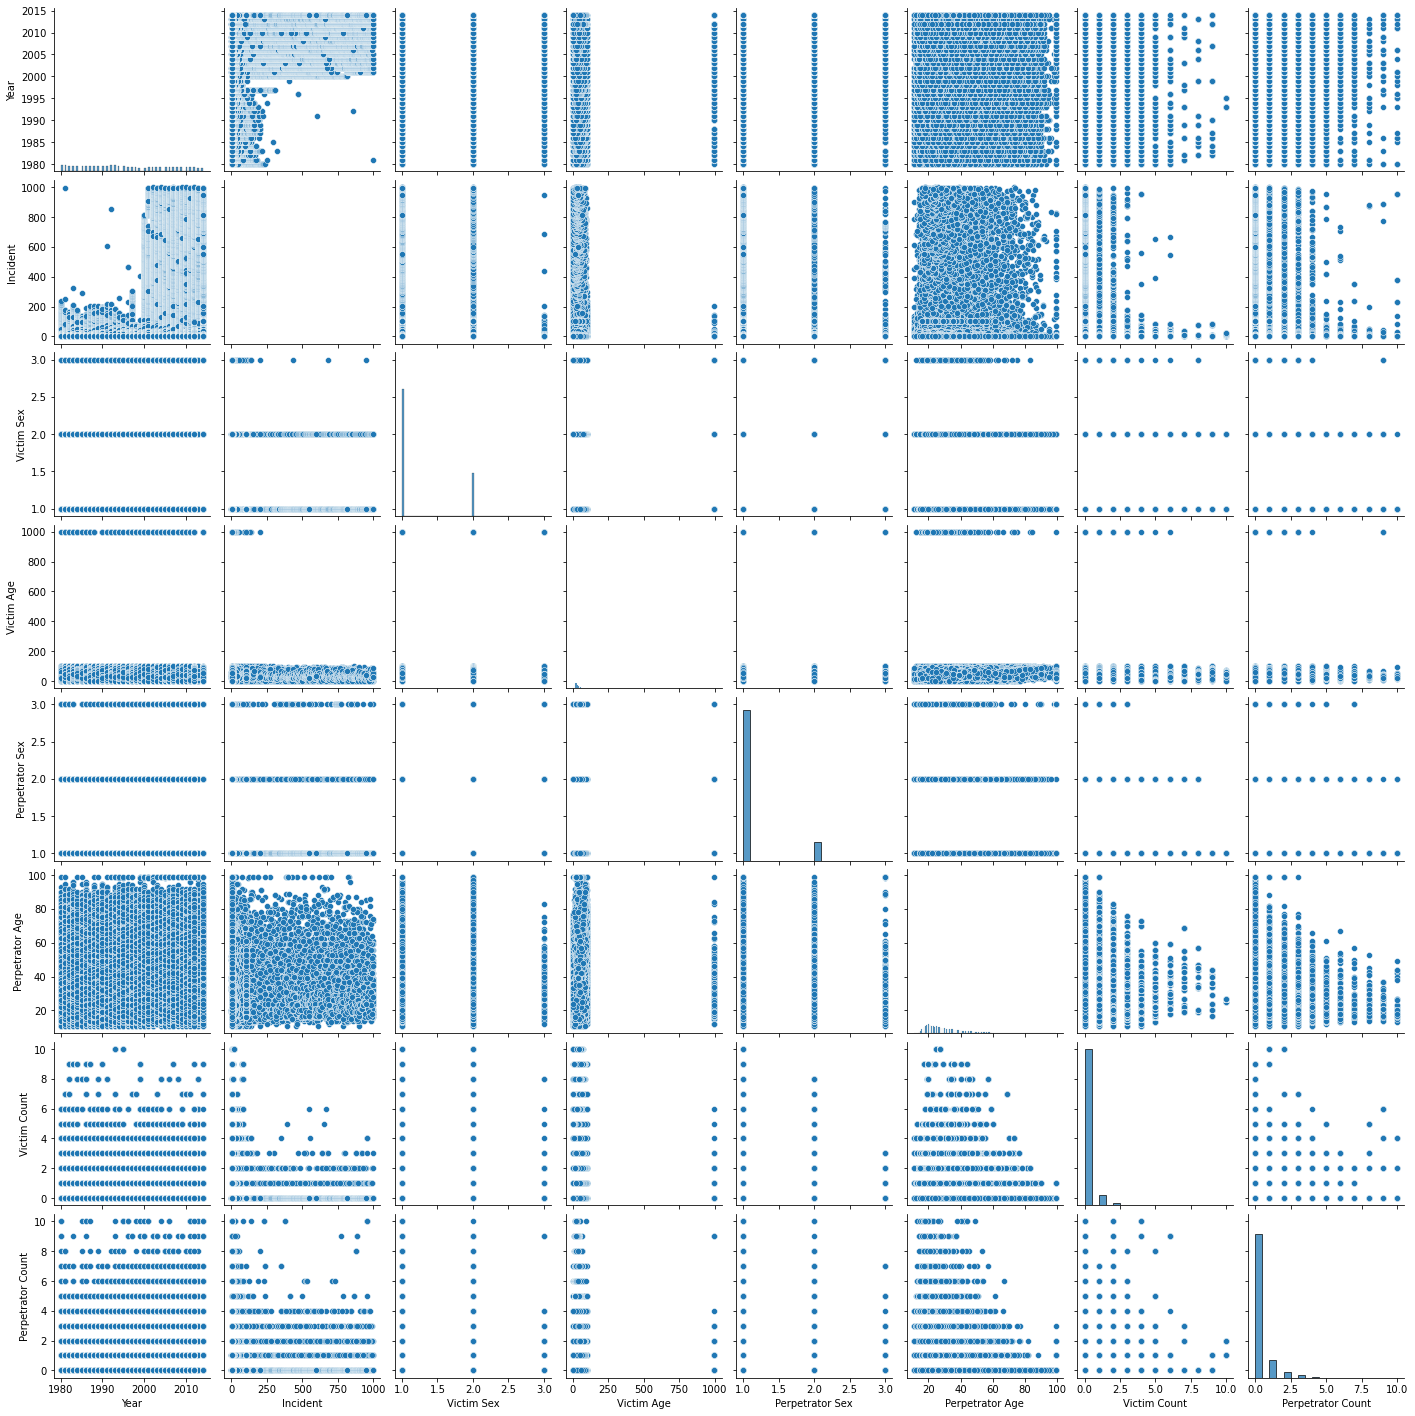

In [65]:
entireset = sns.pairplot(dfsub)

### 7. Observations
#### Number of incidentes decreases with perpetartor age
#### Number of perpetrators involved decreases with their age - it seems like they work in groups more likely when younger
#### The older the perpetrator, the less of victim count there is
#### There is an uptick in incidents after year 1995
#### Most perpetrators are around the age of 20 and this decreases with age

In [67]:
# Export chart
entireset.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pairplot_entire.png'))

In [68]:
# Export data to pkl
dfsub.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dfsub62copy.pkl'))
